In [1]:
import sys, os
sys.path.insert(0, os.path.join("..", ".."))

# Sources of geometry

A quick guide to the main sources of geometry which we'll use, and how we'll use them.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas as gpd
import os
import descartes

import open_cp.plot
import matplotlib.collections

In [3]:
datadir = os.path.join("/media", "disk", "Data")
areas = gpd.GeoDataFrame.from_file(os.path.join(datadir, "Chicago_Areas.geojson"))

# TIGER/Line® Shapefiles

These are the canonical source for USA data.

- https://www.census.gov/geo/maps-data/data/tiger-line.html

The downloads are all shapefiles, so having a look at them in QGis is a good idea...

### Website interface

- Use the Web interface
- Select "Roads", then "All Roads", then "Illinois" and the "Cook County" (which is Chicago).
- Get the file "tl_2016_17031_roads.zip"

### FTP interface

- Browse to the directory "ROADS"
- The files are named using [FIP County Code](https://en.wikipedia.org/wiki/FIPS_county_code).  You will need the "state code" and then the "county code".  This wikipedia page lists them all: [USA Counties](https://en.wikipedia.org/wiki/County_(United_States)).

There are other files you can obtain as well, but the "roads" one seems good enough.

In [4]:
tiger_path = os.path.join("/media", "disk", "TIGER Data")

In [5]:
filename = os.path.join(tiger_path, "tl_2016_17031_roads")
tiger_frame = gpd.GeoDataFrame.from_file(filename)
tiger_frame.head()

,FULLNAME,LINEARID,MTFCC,RTTYP,geometry
0,47th Pl Exd,110380277026,S1400,M,"LINESTRING (-87.595765 41.81460799999999, -87...."
1,Golden Spr,110380298305,S1400,M,"LINESTRING (-87.921616 41.67378399999999, -87...."
2,Edens Expy Spr,1104259027148,S1100,M,LINESTRING (-87.86542699999998 42.149693999999...
3,Edens Expy Spr,1104259564382,S1100,M,"LINESTRING (-87.832262 42.14520399999999, -87...."
4,Edens Expy Spr,1104472109755,S1100,M,"LINESTRING (-87.874499 42.152788, -87.87439399..."


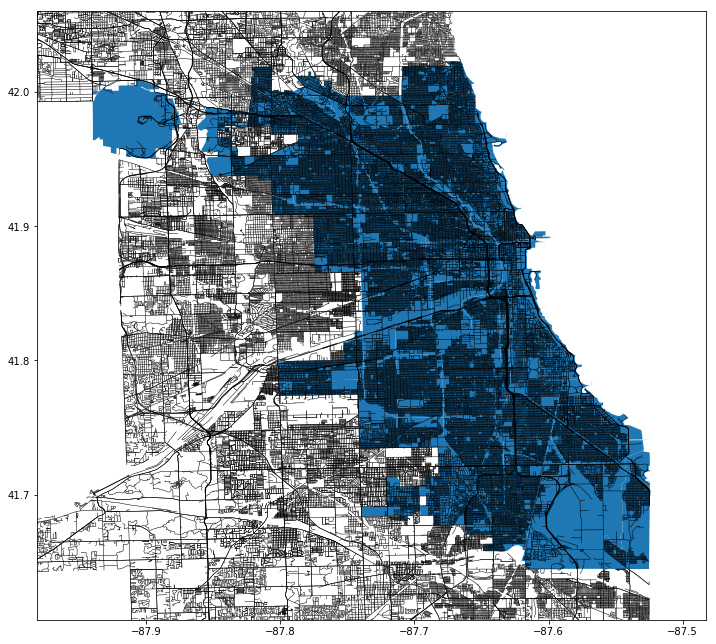

In [6]:
fig, ax = plt.subplots(figsize=(12,12))

lc = matplotlib.collections.LineCollection(open_cp.plot.lines_from_geometry(tiger_frame.geometry),
    color="black", linewidth=0.5)
ax.add_collection(lc)

patches = open_cp.plot.patches_from_geometry(areas.geometry,
    fc="blue", ec="none", alpha=0.5, zorder=5)
ax.add_collection(matplotlib.collections.PatchCollection(patches))
    
ax.set_aspect(1.0)

xmin, ymin, xmax, ymax = areas.total_bounds
xd, yd = xmax - xmin, ymax - ymin
ax.set(xlim=[xmin - xd/10, xmax + xd/10], ylim=[ymin - yd/10, ymax + yd/10])
None

# UK OS data

The two (three) options seem to be:

- OpenRoads: https://www.ordnancesurvey.co.uk/business-and-government/products/os-open-roads.html
- A free download (fill in the form).


In [7]:
ordnancedir = os.path.join("/media", "disk", "OS_OpenMap")
openroadsdir = os.path.join(ordnancedir, "oproad_essh_gz", "data")
file = "SE_RoadLink.shp"

In [8]:
frame = gpd.GeoDataFrame.from_file(os.path.join(openroadsdir, file))
frame.head()

,class,endNode,fictitious,formOfWay,function,geometry,identifier,length,loop,name1,name1_lang,name2,name2_lang,nameTOID,numberTOID,primary,roadNumber,startNode,structure,trunkRoad
0,Not Classified,0CFF70C2-9B29-472E-8A27-CCEA9997037B,false,Single Carriageway,Restricted Local Access Road,"LINESTRING Z (498830.04 441139.46 0, 499026.35...",EA197664-1E58-443D-9370-7C0CD5178DA1,394,false,None,None,None,None,None,None,false,None,A96F9634-8C61-4CF4-9AD0-C8EADA3D7A5B,None,false
1,Unclassified,7D94180C-9D5B-4793-BD55-8BEA91240B9C,false,Single Carriageway,Minor Road,"LINESTRING Z (498926.33 439826.29 0, 498919.15...",9C3EA9EC-5EBB-4487-BEC6-7AC72DA0C31A,57,false,Pudding Gate,None,None,None,osgb4000000010952647,None,false,None,6B9832C7-0778-4ECA-9EC5-C67C700FDFED,None,false
2,Unclassified,0EE39E69-E9D6-4D3A-92A3-E173B28B3C1B,false,Single Carriageway,Minor Road,"LINESTRING Z (498911.98 439771.47 0, 498917.32...",CA83540D-83BF-4204-BADE-DEC248606D64,17,false,Joby Lane,None,None,None,osgb4000000010968479,None,false,None,7D94180C-9D5B-4793-BD55-8BEA91240B9C,None,false
3,Unclassified,D00D9ABE-2FE6-41CA-A56C-C594B9777AEB,false,Single Carriageway,Minor Road,"LINESTRING Z (498922.66 439757.84 0, 498928.97...",E3E62810-76D5-42B0-89D5-69721D2F719B,72,false,Joby Lane,None,None,None,osgb4000000010968479,None,false,None,0EE39E69-E9D6-4D3A-92A3-E173B28B3C1B,None,false
4,Unclassified,6B9832C7-0778-4ECA-9EC5-C67C700FDFED,false,Single Carriageway,Local Road,"LINESTRING Z (498922.66 439757.84 0, 498944.29...",F2867AC1-AB45-4E54-825B-B1CF4FD90AED,123,false,None,None,None,None,None,None,false,None,0EE39E69-E9D6-4D3A-92A3-E173B28B3C1B,None,false


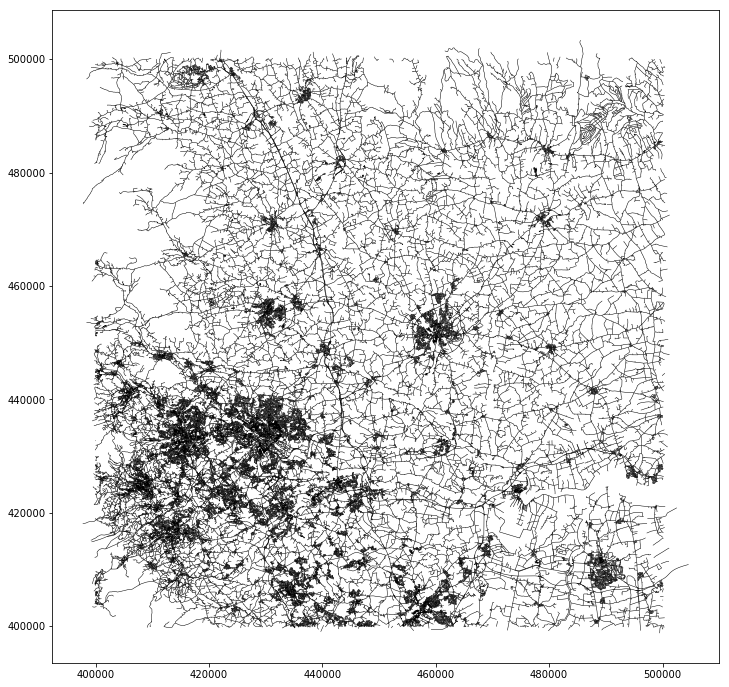

In [9]:
fig, ax = plt.subplots(figsize=(12,12))

lines = open_cp.plot.lines_from_geometry(frame.geometry)
# We get `z` coords, but always 0
for line in lines:
    for coord in line:
        assert coord[2] == 0
    
lines = [ [coord[:2] for coord in line] for line in lines ]
lc = matplotlib.collections.LineCollection(lines, color="black", linewidth=0.5)
ax.add_collection(lc)
    
ax.set_aspect(1.0)

xmin, ymin, xmax, ymax = frame.total_bounds
xd, yd = xmax - xmin, ymax - ymin
ax.set(xlim=[xmin - xd/20, xmax + xd/20], ylim=[ymin - yd/20, ymax + yd/20])
None

## National grid

- https://en.wikipedia.org/wiki/Ordnance_Survey_National_Grid explains this well.

For example, my office is at (53.80417, -1.55494).

- Firstly, check on the [Ordnance Survey site](https://osmaps.ordnancesurvey.co.uk/53.80417,-1.55494,7/pin).
- Gives SE 29408 34300

Now perform the calculation ourself:

- We need to be careful, as the British National Grid uses a different ellipsoid (approximation to the shape of the Earth) than the "usual" GPS based on.
- So we need to use the `transform` method of `pyproj`.  [Credit](https://osedok.wordpress.com/2012/01/17/conversion-of-british-national-grid-wkid27700-to-wgs84wkid4326-and-then-to-webmercator-wkid102100/)
- Project from [EPSG:4326](http://spatialreference.org/ref/epsg/4326/) to [EPSG:27700](http://spatialreference.org/ref/epsg/27700/) to get (429408.57842795923, 434299.8353044173)
- (0,0) is at the South-West corner of the "S" square, and each main square is 500000m in size. So we are in "S"
- Within "S" we find the 100km square: this will be (4,4) == "E".  So our code is "SE"
- The residual coordinate is (29409, 34300) so numerical code "23" so the image is "SE23"

For [OS VectorMap](https://www.ordnancesurvey.co.uk/business-and-government/products/vectormap-district.html) raster images, each image 4000x4000 corresponding to 10000m square.
- Residual coords is (9409, 4300)

For [OS OpenMap Local](https://www.ordnancesurvey.co.uk/business-and-government/products/os-open-map-local.html) we have 4 further squares per image; our residual is in the SE corner.
- Further residual is (5409, 4300)

In [10]:
import pyproj

bng = pyproj.Proj(init="epsg:27700")
wgs84 = pyproj.Proj(init="epsg:4326")

pyproj.transform(wgs84, bng, -1.55494, 53.80417)

(429408.57842795923, 434299.8353044173)

In [11]:
import PIL.Image

In [12]:
vectormap_raster = os.path.join(ordnancedir, "OS VectorMap District (Full Colour Raster) SE", "data")
image1 = PIL.Image.open(os.path.join(vectormap_raster, "SE23.tif"))

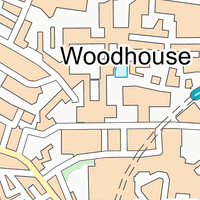

In [13]:
x, y = (9408.57842795923, 4299.8353044173)
x = x / 10000 * 4000
y = 4000 - y / 10000 * 4000
image1.crop((int(x-100), int(y-100), int(x+100), int(y+100)))

In [14]:
localmap_raster = os.path.join(ordnancedir, "OS OpenMap Local (Full Colour Raster) SE", "data")
image2 = PIL.Image.open(os.path.join(localmap_raster, "SE23SE.tif"))

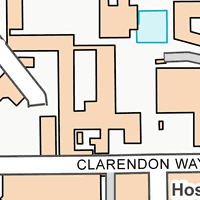

In [15]:
x, y = (4408.57842795923, 4299.8353044173)
y = 5000 - y
image2.crop((int(x-100), int(y-100), int(x+100), int(y+100)))

# Open Street Map

OSM has the advantage of covering the whole planet, and being free.  A downside is that it's distinctly harder to access and process.

- In Python, an excellent off the shelf package is [OSMNX](https://github.com/gboeing/osmnx)

However, OSMNX is a bit opaque, and downloads data.  We prefer to work with off-line data:

- Available from [Geofabrick](http://download.geofabrik.de/)

We then have 2 options:

- Download the raw data, and process using [OSMDigest](https://github.com/MatthewDaws/OSMDigest) for example.
- Download the processed shapefiles.  I have found that for e.g. looking at buildings, these are far from complete.  However, for _roads_, they seem fine.  However, the data is a little _messy_ as we shall see...

We again use Illinois as an example: http://download.geofabrik.de/north-america/us/illinois.html

In [16]:
osm_path = os.path.join("/media", "disk", "OSM_Data")

file = os.path.join(osm_path, "illinois", "gis.osm_roads_free_1.shp")
frame = gpd.GeoDataFrame.from_file(file)
frame.head()

,bridge,code,fclass,geometry,layer,maxspeed,name,oneway,osm_id,ref,tunnel
0,F,5114,secondary,"LINESTRING (-87.9464701 41.7886068, -87.945344...",0.0,0.0,55th Street,B,4265057,CR 35,F
1,F,5114,secondary,"LINESTRING (-87.9944122 41.7878553, -87.994358...",0.0,0.0,Fairview Avenue,B,4265058,None,F
2,F,5114,secondary,"LINESTRING (-87.9674546 41.8317429, -87.966519...",0.0,72.0,31st Street,B,4267607,None,F
3,F,5122,residential,"LINESTRING (-87.99418439999999 41.7805586, -87...",0.0,0.0,59th Street,B,4271616,None,F
4,F,5122,residential,"LINESTRING (-87.99407119999999 41.7769327, -87...",0.0,0.0,61st Street,B,4275365,None,F


In [17]:
# Perform some cleaning
frame = frame[frame.geometry.map(lambda x : x is not None)]

bds = frame.bounds
bad = bds.minx < -100
frame = frame[~bad]

In [18]:
# This is, erm, messy...
list(set(frame.fclass))[:10]

['rmsidentiel  !',
 'service        "  (',
 'residgntia,    0',
 'r%qide~dial',
 'rgsidential    a',
 'residential`   0',
 'q%rvice  !',
 'rdsidential',
 'residential   (  `',
 'residential  " 0']

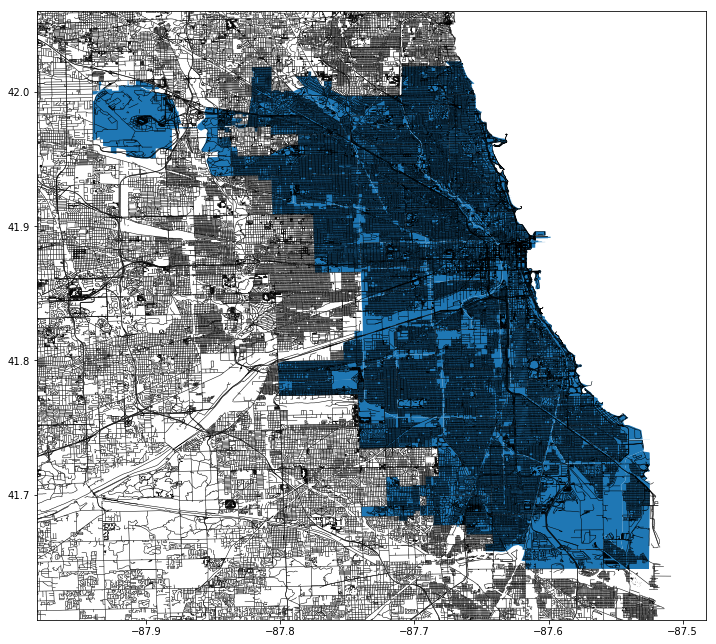

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

lc = matplotlib.collections.LineCollection(open_cp.plot.lines_from_geometry(frame.geometry),
    color="black", linewidth=0.5)
ax.add_collection(lc)

patches = open_cp.plot.patches_from_geometry(areas.geometry,
    fc="blue", ec="none", alpha=0.5, zorder=5)
ax.add_collection(matplotlib.collections.PatchCollection(patches))
    
ax.set_aspect(1.0)

xmin, ymin, xmax, ymax = areas.total_bounds
xd, yd = xmax - xmin, ymax - ymin
ax.set(xlim=[xmin - xd/10, xmax + xd/10], ylim=[ymin - yd/10, ymax + yd/10])
None

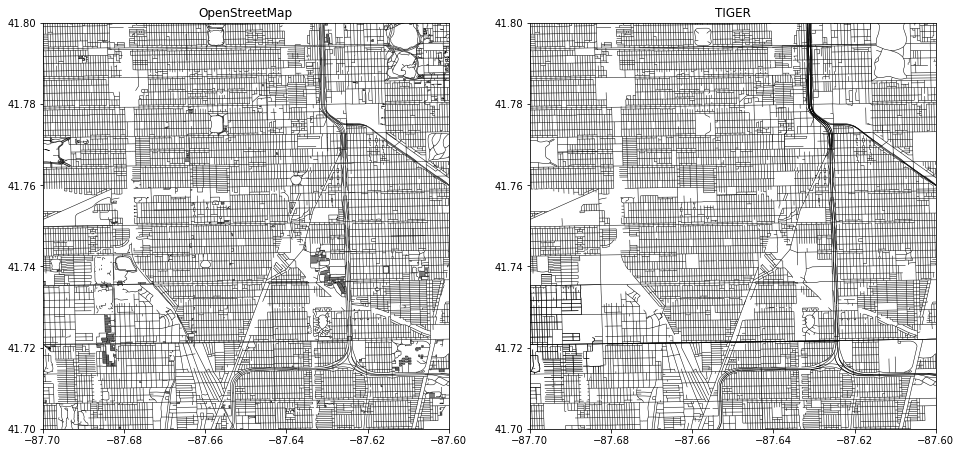

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(16,10))

ax[0].set_aspect(1)
lc = matplotlib.collections.LineCollection(open_cp.plot.lines_from_geometry(frame.geometry),
    color="black", linewidth=0.5)
ax[0].add_collection(lc)
ax[0].set(title="OpenStreetMap")

ax[1].set_aspect(1)
lc = matplotlib.collections.LineCollection(open_cp.plot.lines_from_geometry(tiger_frame.geometry),
    color="black", linewidth=0.5)
ax[1].add_collection(lc)
ax[1].set(title="TIGER")

for a in ax:
    a.set(xlim=[-87.7, -87.6], ylim=[41.7, 41.8])